# Logistic Regression for the clear area

In [3]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Define the trainining data (X: input features, y : output feature)

In [4]:
df = dd.read_csv('test4_nosmoke*.csv')
df = df.compute()
print(df.shape)
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]
X = X.to_numpy()
y = y.to_numpy().reshape(-1)
del df


(84000, 104)


Fit the LogisticRegression model with X and y   
Please note that through the GridSearchCV, we found the best performing C parameter: 100
* _if you want to take a look at the code for the GridSearchCV, please take a look at the `python script` for the logistic regression_

In [5]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 10000, n_jobs = -1, C = 100)
logreg.fit(X,y)

LogisticRegression(C=100, max_iter=10000, n_jobs=-1)

In [6]:
quant_names = pd.read_csv('clean_polyname.csv')

In [7]:
colors = ['blue' if abs(x) < 1.5 else 'red' for x in logreg.coef_[:,:78].reshape(-1)]

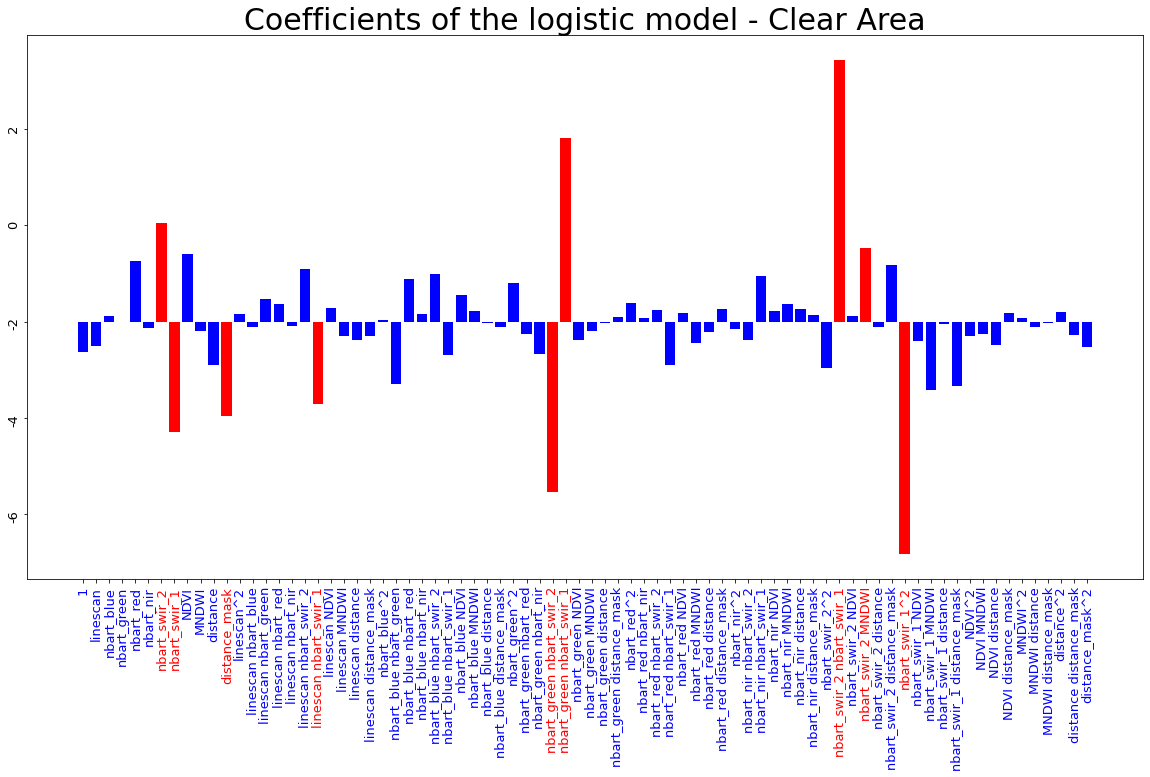

In [8]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(x = quant_names.clean_polyname, height = logreg.coef_[:,:78].reshape(-1), color = colors)
ax.set_xticklabels(quant_names.clean_polyname, {'fontsize' : 13},rotation=90)
ax.set_yticklabels([-8,-6, -4,-2,0,2,4,6,8],{'fontsize' : 13},rotation=90)
[t.set_color(i) for (i,t) in
 zip(colors,ax.xaxis.get_ticklabels())]
ax.set_title('Coefficients of the logistic model - Clear Area', {'fontsize': 30})
plt.savefig('logreg_coef.png')
plt.show()

In [9]:
colors = ['blue' if abs(x) < .5 else 'red' for x in logreg.coef_[:,78:].reshape(-1)]

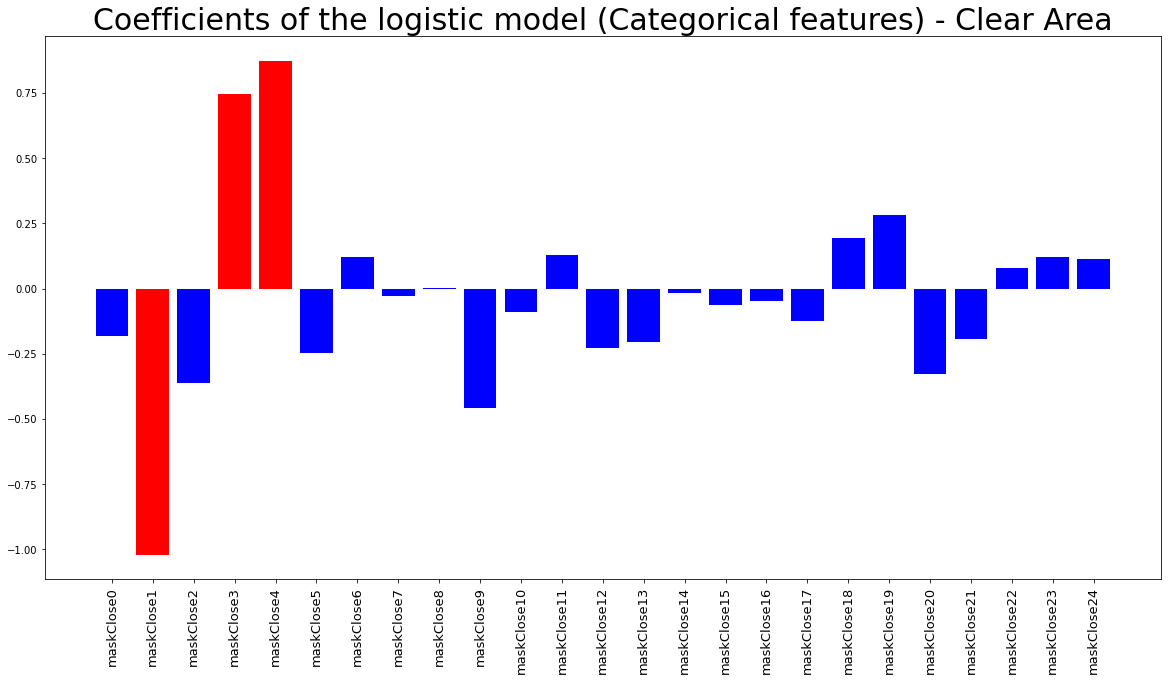

In [10]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(x = ['maskClose' + x for x in np.arange(25).astype(str)],height = logreg.coef_[:,78:].reshape(-1), color = colors)
ax.set_xticklabels( ['maskClose' + x for x in np.arange(25).astype(str)], {'fontsize' : 13},rotation=90)
ax.set_title('Coefficients of the logistic model (Categorical features) - Clear Area', {'fontsize': 30})
plt.savefig('logreg_coef_categories.png')
plt.show()